In [7]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import load_model
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [77]:
#Getting data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "NewDataa", labels='inferred', label_mode="categorical",class_names=['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo'],
    color_mode="grayscale", batch_size=32, image_size=(28, 28), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "NewDataa", labels='inferred', label_mode="categorical", class_names=['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo'],
    color_mode="grayscale", batch_size=32, image_size=(28, 28), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)


Found 1400 files belonging to 7 classes.
Using 1120 files for training.
Found 1400 files belonging to 7 classes.
Using 280 files for validation.


tensorflow.python.data.ops.dataset_ops.DatasetV2

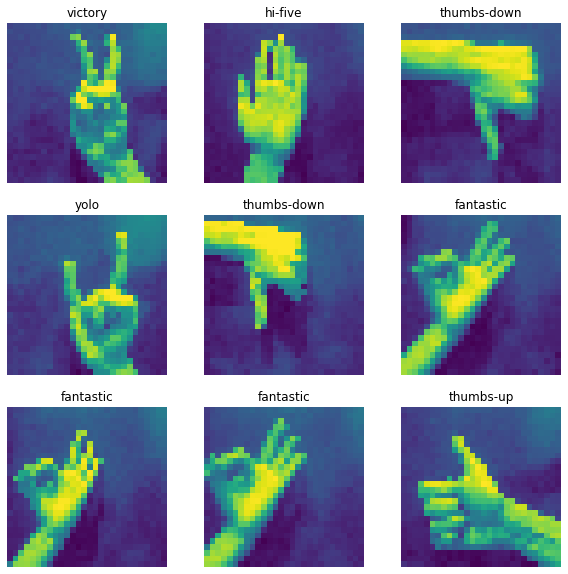

In [124]:
#Visiualizing Data
class_names = ['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo']
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i],axis=0)])
    plt.axis("off")
    

In [79]:
#Loading MNIST model as base
model = load_model('mnistModel')
model.layers[0].trainable = False
model.layers[1].trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,385,866
Non-trainable params: 640
_________________________________________________________________


In [80]:
#Creating new model
TL_Model = Sequential()
TL_Model.add(model.layers[0])
TL_Model.add(model.layers[1])
TL_Model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu',name='c2'))
TL_Model.add(MaxPooling2D(pool_size = (2, 2),name ='m2'))
TL_Model.add(Flatten())
TL_Model.add(Dense(64,activation = 'relu'))
TL_Model.add(Dropout(0.20))
TL_Model.add(Dense(7,activation='softmax'))


In [81]:
#Model compilation
TL_Model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)

In [82]:
#Model summary
TL_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 11, 11, 16)        9232      
_________________________________________________________________
m2 (MaxPooling2D)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                25664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [83]:
#Training the model
fit = TL_Model.fit(train_data,validation_data=val_data,epochs=25)

Epoch 1/25
35/35 [==============================] - 61s 2s/step - loss: 4.6907 - accuracy: 0.4518 - val_loss: 0.8515 - val_accuracy: 0.7393
Epoch 2/25
35/35 [==============================] - 32s 909ms/step - loss: 0.5836 - accuracy: 0.8062 - val_loss: 0.3915 - val_accuracy: 0.8821
Epoch 3/25
35/35 [==============================] - 32s 904ms/step - loss: 0.2730 - accuracy: 0.9125 - val_loss: 0.1843 - val_accuracy: 0.9393
Epoch 4/25
35/35 [==============================] - 32s 914ms/step - loss: 0.1416 - accuracy: 0.9500 - val_loss: 0.1129 - val_accuracy: 0.9536
Epoch 5/25
35/35 [==============================] - 32s 921ms/step - loss: 0.0873 - accuracy: 0.9705 - val_loss: 0.0808 - val_accuracy: 0.9750
Epoch 6/25
35/35 [==============================] - 32s 912ms/step - loss: 0.0641 - accuracy: 0.9795 - val_loss: 0.0805 - val_accuracy: 0.9643
Epoch 7/25
35/35 [==============================] - 32s 910ms/step - loss: 0.0453 - accuracy: 0.9848 - val_loss: 0.0367 - val_accuracy: 0.9821
Ep

In [120]:
#Data for plots
acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(1, len(loss) + 1)

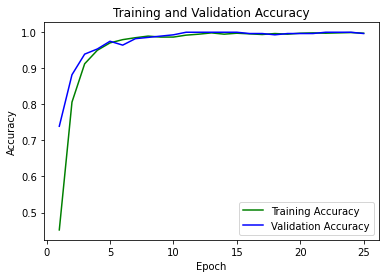

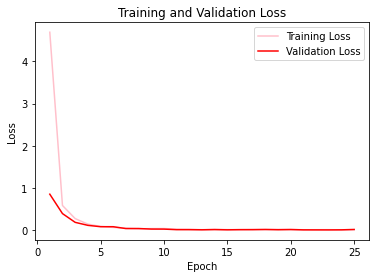

<Figure size 432x288 with 0 Axes>

In [121]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [122]:
#Saving model
TL_Model.save('NewModels/TransferLearnedModel.h5')

In [12]:
TL_model = load_model('Final Models\TransferLearnedModel.h5')

In [18]:
#Predicting images
def Predict_image(dir,model):
    class_names = ['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo']
    img = image.load_img(dir,color_mode='grayscale',target_size=(28,28,1))
    ar = image.img_to_array(img)
    plt.imshow(ar)
    ar = np.expand_dims(ar,axis=0)
    pred = model.predict(ar)
    pred = pred.flatten()
    for i in range(0,len(class_names)):
        print("{} => {}".format(class_names[i],pred[i]))

#Predict_image('Accumulated//high_five//WIN_20201205_21_23_04_Pro.jpg',TL_odel)

In [1]:
import os

Test_Set\34369987-man-hand-indicating-peace-victory-sign-the-v-sign-is-a-hand-gesture-in-which-the-index-and-middle-fi.jpg
Test_Set\6ip5qj7pT (1).jpg
Test_Set\helo.jpg
Test_Set\images122.jpg
Test_Set\images185.jpg
Test_Set\images264.jpg
Test_Set\images270.jpg
Test_Set\images302.jpg
Test_Set\images389.jpg


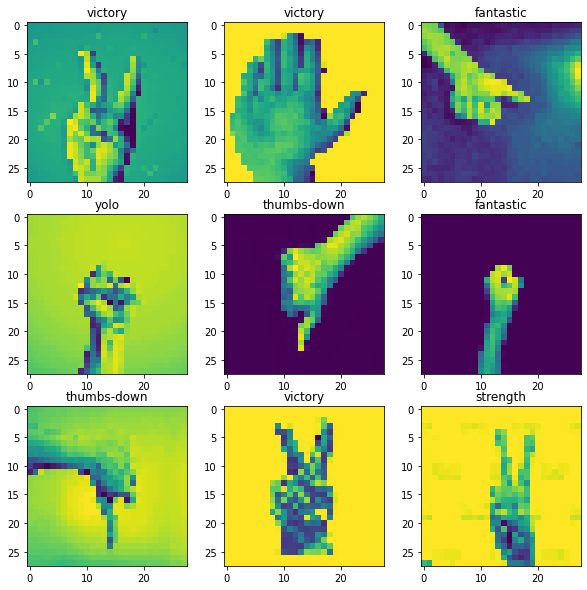

In [32]:
def Predict_Images(dir,model)
    plt.figure(figsize=(10, 10))
    class_names = ['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo']
    count = 0
    for root, dirs, files in os.walk(dir, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        ax = plt.subplot(3, 3, count + 1)
        img = image.load_img(os.path.join(root, name),color_mode='grayscale',target_size=(28,28,1))
        ar = image.img_to_array(img)
        plt.imshow(ar)
        ar = np.expand_dims(ar,axis=0)
        pred = np.argmax(model.predict(ar),axis=1)
        plt.title(class_names[pred[0]])
        count = count + 1
        if(count == 9):
            break
    